In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# DATA VISUALIZATIONS AND EDA

Text(0.5, 1.0, 'Số lượng mẫu của mỗi lớp')

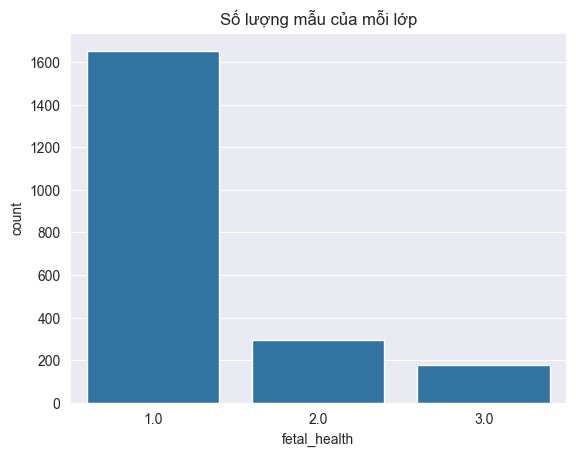

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.countplot(data=data,x='fetal_health')
plt.title("Số lượng mẫu của mỗi lớp")

In [12]:
X=data.drop(['fetal_health'],axis=1)
y=data['fetal_health']

# Oversampling of Minority Class

In [13]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)


# Dimensionality Reduction and visualization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_over)


In [18]:
X_scaled=pd.DataFrame(X_scaled,columns=X_over.columns)
X_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.530836,-0.524717,-0.233077,-1.133808,-0.621282,-0.109664,-0.46338,0.978534,-0.698050,0.941247,...,-0.064694,-1.027246,-1.982851,-0.622414,-0.426965,-0.573097,0.280087,-0.763186,1.070736,1.161482
1,-0.332460,1.496661,-0.233077,0.715420,0.291341,-0.109664,-0.46338,-2.272334,0.843899,-0.735305,...,1.432559,-0.847863,1.853782,0.655488,0.946014,0.343178,0.232432,0.259414,-0.307918,-0.348536
2,-0.232595,0.485972,-0.233077,1.331829,0.291341,-0.109664,-0.46338,-2.330385,0.843899,-0.735305,...,1.432559,-0.847863,1.853782,0.336012,0.946014,0.343178,0.184776,0.151772,-0.285317,-0.348536
3,-0.132731,0.485972,-0.233077,1.331829,0.291341,-0.109664,-0.46338,-2.330385,1.133014,-0.735305,...,1.137646,-1.296320,0.361758,2.252865,-0.426965,0.168650,0.137121,0.097951,-0.285317,1.161482
4,-0.332460,1.833557,-0.233077,1.331829,-0.621282,-0.109664,-0.46338,-2.330385,1.133014,-0.735305,...,1.137646,-1.296320,0.361758,1.613914,-0.426965,0.168650,0.232432,0.151772,-0.330519,1.161482


In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) #getting 3 components with highest variance
X_pca=pca.fit_transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,-0.498218,-2.198543,0.822958
1,1.812931,3.289589,0.872733
2,1.795819,3.175870,0.936587
3,1.628869,3.755679,1.896332
4,1.325483,3.874369,2.259107


In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #0.95 here refers that the total variance explained by the components must be atleast 95%
X_pca_final=pca.fit_transform(X_scaled)
X_pca_final=pd.DataFrame(X_pca_final)
X_pca_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.498218,-2.198449,0.822438,0.158014,1.286646,-1.175684,1.590060,-0.330507,0.330838,-0.651857,-0.859631,0.642338,-0.855469
1,1.812931,3.289604,0.872509,-0.049300,-0.664856,0.592524,0.067097,0.820971,0.338622,0.463299,-0.399224,-0.193708,0.519408
2,1.795819,3.175860,0.936470,-0.233275,-0.226013,0.460720,-0.936382,0.700823,-0.311769,0.605826,-0.517656,-0.319166,0.337187
3,1.628869,3.755661,1.896656,0.483795,1.433423,-0.526960,-0.175105,-0.159512,-1.688171,0.656621,-0.739233,-0.800520,0.341396
4,1.325484,3.874221,2.260082,0.807381,0.387855,-0.425672,0.478506,-0.194140,-0.943072,-0.021638,-0.904957,-0.978398,-0.107993


# Model Building

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca_final,y_over,random_state=42,stratify=y_over)

## K-Nearest Neighbor

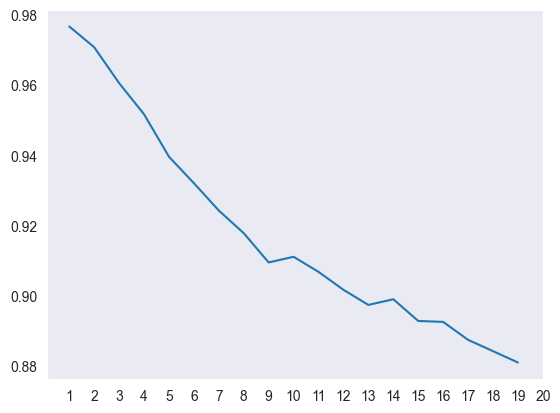

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

<Axes: >

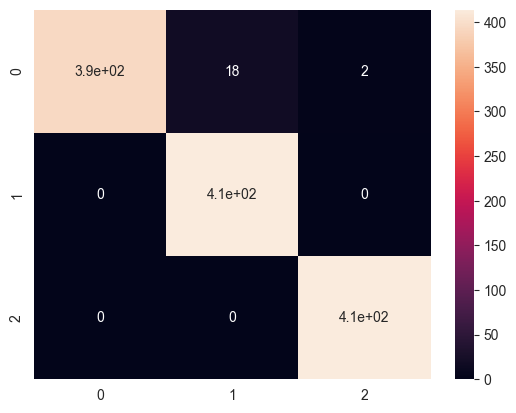

In [25]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(confusion_knn,annot=True)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.98       414
         2.0       0.96      1.00      0.98       414
         3.0       1.00      1.00      1.00       414

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242



## Support Vector Machine

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       414
         2.0       1.00      1.00      1.00       414
         3.0       1.00      1.00      1.00       414

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



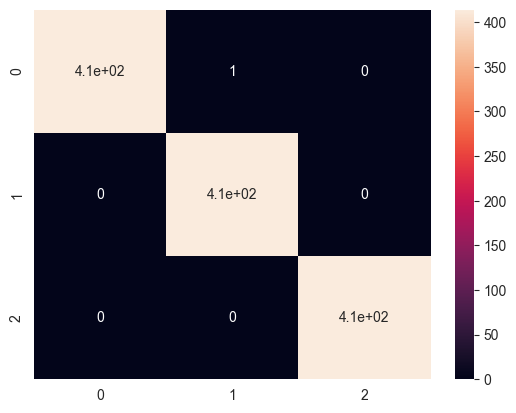

In [28]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_svc,annot=True)
print(classification_report(y_test,y_pred_svc))

## Logistic Regression

c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

              precision    recall  f1-score   support

         1.0       0.92      0.86      0.89       414
         2.0       0.80      0.82      0.81       414
         3.0       0.88      0.91      0.89       414

    accuracy                           0.86      1242
   macro avg       0.87      0.86      0.86      1242
weighted avg       0.87      0.86      0.86      1242



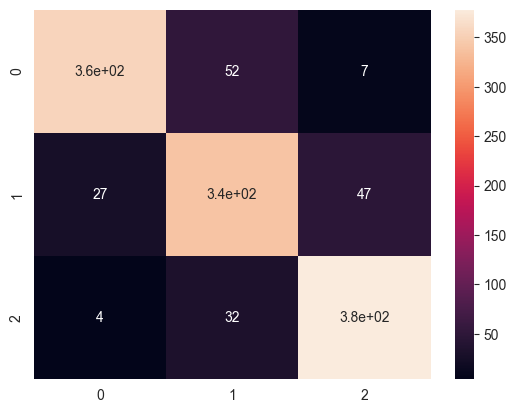

In [30]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[30,50,70,150,200,300,400,500,700,1200,1500]}
log=RandomizedSearchCV(LogisticRegression(),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
sns.heatmap(confusion_log,annot=True)
print(classification_report(y_test,y_pred_log))

# Random Forest Classifier

c:\Users\dtptr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       414
         2.0       0.95      1.00      0.98       414
         3.0       1.00      1.00      1.00       414

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242



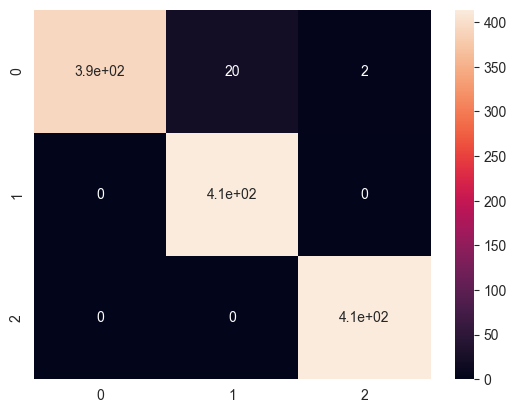

In [31]:
param_grid = {
'n_estimators': [50, 100, 150, 200],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_rcv,annot=True)
print(classification_report(y_test,y_pred_rcv))